In [1]:
import numpy as np
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem,Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors
import warnings
warnings.filterwarnings('ignore')

In [2]:
csv_file = r"C:\Users\intui\Desktop\Coursework\Fall 2022\(24-787) Introduction to Machine Learning and Artificial Intelligence for Engineers\Project\export.csv"
data = pd.read_csv(csv_file)
data

,smiles,property,value
0,[*]CC([*])C,Eat,-5.14
1,[*]CC([*])F,Eat,-5.18
2,[*]CC([*])(F)F,Eat,-5.21
3,[*]C(F)C([*])(F)F,Eat,-5.11
4,[*]CCC(F)(F)C([*])(F)F,Eat,-5.21
...,...,...,...
6260,[*]C(F)(F)C(F)(F)C(S1)=CC=C1C(S2)=CC=C2[*],eps,4.36
6261,[*]C(F)(F)C(F)(F)C(=O)O[*],eps,3.31
6262,[*]C(F)(F)C(=O)C(F)(F)C(S1)=CC=C1[*],eps,4.05
6263,[*]C(F)(F)C(=O)C(F)(F)C(C=C1)=CC=C1[*],eps,3.57


In [3]:
def canonical(smiles):
    
    a,b = [],[]
    
    for i in smiles:
        a.append(Chem.MolFromSmiles(i))
        
    for j in a:
        b.append(Chem.MolToSmiles(j))
                 
    return b

Fingerprint = canonical(data['smiles'])


In [4]:
data['smiles'] = Fingerprint
data

,smiles,property,value
0,*CC(*)C,Eat,-5.14
1,*CC(*)F,Eat,-5.18
2,*CC(*)(F)F,Eat,-5.21
3,*C(F)C(*)(F)F,Eat,-5.11
4,*CCC(F)(F)C(*)(F)F,Eat,-5.21
...,...,...,...
6260,*c1ccc(-c2ccc(C(F)(F)C(*)(F)F)s2)s1,eps,4.36
6261,*OC(=O)C(F)(F)C(*)(F)F,eps,3.31
6262,*c1ccc(C(F)(F)C(=O)C(*)(F)F)s1,eps,4.05
6263,*c1ccc(C(F)(F)C(=O)C(*)(F)F)cc1,eps,3.57


In [5]:
properties = data.groupby('property').count()
properties

,smiles,value
property,,
Eat,390,390
Eea,368,368
Egb,561,561
Egc,3380,3380
Ei,370,370
Xc,432,432
eps,382,382
nc,382,382


In [6]:
df1 = data.groupby('property').get_group('Eat').index
df2 = data.groupby('property').get_group('Eea').index
df3 = data.groupby('property').get_group('Egb').index
df4 = data.groupby('property').get_group('Egc').index
df5 = data.groupby('property').get_group('Ei').index
df6 = data.groupby('property').get_group('Xc').index
df7 = data.groupby('property').get_group('eps').index
df8 = data.groupby('property').get_group('nc').index

df3[0], df3[-1]

(4202, 4762)

### Developed Algorithmn

In [7]:
list1 = (data.to_numpy()).tolist()
list2 = ["C", "O", "c", "F", "N", "Br", "S"]

In [8]:
def atommass(a):
    mass = {"C": 12, "O": 16, "F": 18, "N": 14, "S": 32, "Br": 80, "c": 12}
    for items, value in mass.items():
        if a == items:
            z = value
            break
        else:
            z = 0
    return z

def atomno(a):
    num = {"C": 6, "O": 8, "F": 9, "N": 7, "S": 16, "Br": 35, "c": 6}
    for items, value in num.items():
        if a == items:
            z = value
            break
        else:
            z = 0
    return z

def valency(a):
    val = {"C": 4, "O": 2, "F": 1, "N": 3, "S": 2, "Br": 1, "c": 4}
    for items, value in val.items():
        if a == items:
            z = value
            break
        else:
            z = 0
    return z

def hydrogen(smile):
    if smile[0] == "=" or smile[2] == "=" :
        H = 1
    elif smile[0] == "=" and smile[2] == "=":
        H = 0
    else:
        H = 2
    return H

def endhydrogen(smile):
    if smile[0] == "=":
        H = 2
    else:
        H = 3
    return H

In [9]:
identifier = []
A=[]
Aupdated =[]
for i in range(len(list1)):
    orderno = []
    B = []
    for j in range(3, len(list1[i])):
        if list1[i][j] in list2:
            mass = atommass(list1[i][j])
            num = atomno(list1[i][j])
            val = valency(list1[i][j])
            if j != 3 and j != (len(list1[i])-1):
                smiles = list1[i][j-1] + list1[i][j] + list1[i][j+1]
                H = hydrogen(smiles)
            else:
                if j == 3:
                    smiles = list1[i][j] + list1[i][j+1]
                else:
                    smiles = list1[i][j-1] + list1[i][j]
                H = endhydrogen(smiles)
            idno = hash((mass, num, val, H))
            B.append(idno)
        if list1[i][j] == "=":
            orderno.append(j)

    upB = B
    for iteration in range(2): 
        update = []
        for k in range(len(upB)):
            Q = []
            if k == 0:
                if list1[i][4]== "=":
                    g = 2
                else:
                    g = 1 
                Q = [iteration + 1 , upB[k]] + [g, upB[k+1]]
            elif k != len(B) -1:
                
                Q = [iteration + 1 , upB[k]] + [1, upB[k-1]] + [1, upB[k+1]]
            else:
                Q = [iteration + 1 , upB[k]] + [1, upB[k-1]]  
            update.append(hash(tuple(Q)))
        upB = update
    A.append(B)
    Aupdated.append(upB)

In [10]:
fingerprint=[]
for i in range(len(Aupdated)):         
    fp = np.zeros(1024)
    remainder = []
    for j in range(len(Aupdated[i])):
        remainder.append(Aupdated[i][j] % 1024)
    for x in remainder:
        fp[x] = 1
    fingerprint.append(fp)

In [11]:
df_n = pd.DataFrame(fingerprint)
df_n

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6260,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6261,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6262,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6263,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
def scale_data(X):
    xmean = X.mean(axis=0)  # average of every column
    xstd = X.std(axis=0)
    data = (X - xmean) / xstd
    return data

In [13]:
Y_global = pd.DataFrame(data.value)
# Y_global = scale_data(Y_globe)
# df_new = df_new.dropna(axis = 1, how = 'all')
X_global = df_n
display(X_global, Y_global)

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6260,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6261,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6262,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6263,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,value
0,-5.14
1,-5.18
2,-5.21
3,-5.11
4,-5.21
...,...
6260,4.36
6261,3.31
6262,4.05
6263,3.57


## Machine Learning Model - Support Vector Regression

In [14]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.svm import SVR
import matplotlib.pyplot as plt

### Property XC

In [15]:
x_XC = X_global.iloc[df6[0]:df6[-1] + 1]
y_XC = Y_global.iloc[df6[0]:df6[-1] + 1]
display(x_XC, y_XC)

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
390,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
391,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
392,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
393,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
394,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
818,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
819,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
820,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,value
390,47.80
391,44.47
392,34.04
393,20.01
394,21.64
...,...
817,31.84
818,25.58
819,29.05
820,21.74


In [16]:
support_vector_regressor_XC = SVR(kernel = 'rbf')
support_vector_regressor_XC.fit(x_XC, y_XC)
y_XC_pred = support_vector_regressor_XC.predict(x_XC)

result_XC = x_XC
result_XC['value'] = y_XC
result_XC['prediction'] = y_XC_pred.tolist()
result_XC.head()

,0,1,2,3,4,5,6,7,8,9,...,1016,1017,1018,1019,1020,1021,1022,1023,value,prediction
390,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,47.80,31.01289
391,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,44.47,31.01289
392,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34.04,31.01289
393,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.01,31.01289
394,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.64,31.01289


In [17]:
R2_XC = r2_score(y_XC, y_XC_pred)
print('R^2 of Crystallization Tendency:', R2_XC)

RMSE_XC = np.sqrt(mean_squared_error(y_XC, y_XC_pred))
print('RMSE of Crystallization Tendency:', RMSE_XC)

R^2 of Crystallization Tendency: -0.05616579091597229
RMSE of Crystallization Tendency: 24.362534272895747


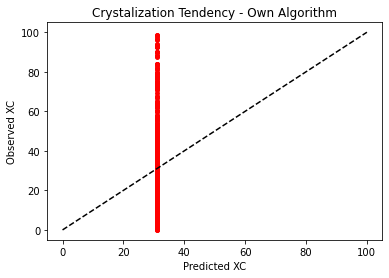

In [18]:
plt.scatter(y_XC_pred, y_XC, c = "r", s = 15)
plt.plot([0, 100], [0, 100] ,"k--")
plt.xlabel('Predicted XC')
plt.ylabel('Observed XC')
plt.title("Crystalization Tendency - Own Algorithm");

### Cross Validation - XC

In [19]:
X_XC_train, X_XC_test, Y_XC_train, Y_XC_test = train_test_split(x_XC, y_XC, test_size = 0.3)
  
SVR_XC = SVR()
  
SVR_XC.fit(X_XC_train, Y_XC_train) 

scores_XC = cross_val_score(SVR_XC, X_XC_train, Y_XC_train , cv = 5, scoring = 'neg_mean_squared_error')

Y_XC_pred_test = SVR_XC.predict(X_XC_test)
# type(Y_EPS_test)
# Y_EPS_pred_train = SVR_EPS.predict(X_EPS_train)

result1_XC = X_XC_test
result1_XC['value'] = Y_XC_test
result1_XC['prediction'] = Y_XC_pred_test.tolist()
RMSE_XC_CV = np.sqrt(np.absolute(min(scores_XC)))
print('RMSE of Crystalization Tendency after Cross Validation is:', RMSE_XC_CV)

RMSE of Crystalization Tendency after Cross Validation is: 7.848564501484464


### Hyperparameter Tuning - XC

In [20]:
SVR_XC_HYP = SVR()
params_XC = {
    'C': [0.1, 1, 10, 100, 1000], 
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf']
}

grid_XC = GridSearchCV(SVR_XC_HYP, params_XC, refit = True, verbose = 3)

grid_XC.fit(X_XC_train, Y_XC_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.034 total time=   0.0s
[CV 2/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.006 total time=   0.0s
[CV 3/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.111 total time=   0.0s
[CV 4/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.101 total time=   0.0s
[CV 5/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.004 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.097 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.041 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.065 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.039 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.056 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.245 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 2/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.974 total time=   0.1s
[CV 3/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.922 total time=   0.1s
[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.959 total time=   0.1s
[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.953 total time=   0.1s
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=1.000 total time=   0.1s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=1.000 total time=   0.1s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.999 total time=   0.1s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=1.000 total time=   0.1s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=1.000 total time=   0.1s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=1.000 total time=   0.0s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=1.000 total time=   0.0s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=1.000 total time=   0.0s
[CV 4/5] END ....C=1000, gam

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [21]:
print(grid_XC.best_params_)
print(grid_XC.best_estimator_)

{'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
SVR(C=1000, gamma=0.0001)


In [22]:
grid_predictions_XC = grid_XC.predict(X_XC_test)
grid_predictions_full_XC = grid_XC.predict(x_XC)

In [23]:
R2_XC_tuned = r2_score(Y_XC_test, grid_predictions_XC)
print('R^2 of Crystallization Tendency after Tuning:', R2_XC_tuned)

RMSE_XC_tuned = np.sqrt(mean_squared_error(Y_XC_test, grid_predictions_XC))
print('RMSE of Crystalization Tendency after Tuning:', RMSE_XC_tuned)

R^2 of Crystallization Tendency after Tuning: 0.9916170626891267
RMSE of Crystalization Tendency after Tuning: 2.120904544057104


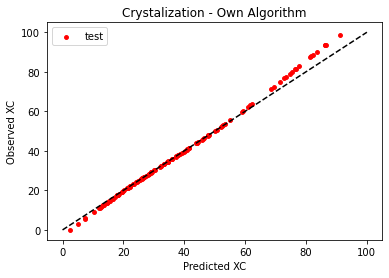

In [24]:
plt.scatter(grid_predictions_XC, Y_XC_test, c = "r", s = 15, label = 'test')
plt.plot([0, 100], [0, 100] ,"k--")
plt.xlabel('Predicted XC')
plt.ylabel('Observed XC')
plt.title("Crystalization - Own Algorithm")
plt.legend();

### Property EGC

In [25]:
x_EGC = X_global.iloc[df4[0]:df4[-1] + 1]
y_EGC = Y_global.iloc[df4[0]:df4[-1] + 1]
display(x_EGC, y_EGC)

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
822,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
823,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
824,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
825,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
826,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4197,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4198,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4199,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4200,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,value
822,6.8972
823,6.5196
824,6.5170
825,6.7336
826,6.7394
...,...
4197,3.3666
4198,0.2161
4199,0.1032
4200,0.1771


In [26]:
support_vector_regressor_EGC = SVR(kernel = 'rbf')
support_vector_regressor_EGC.fit(x_EGC, y_EGC)
y_EGC_pred = support_vector_regressor_EGC.predict(x_EGC)

result_EGC = x_EGC
result_EGC['value'] = y_EGC
result_EGC['prediction'] = y_EGC_pred.tolist()
result_EGC.head()

,0,1,2,3,4,5,6,7,8,9,...,1016,1017,1018,1019,1020,1021,1022,1023,value,prediction
822,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.8972,4.6244
823,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.5196,4.6244
824,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.5170,4.6244
825,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.7336,4.6244
826,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.7394,4.6244


In [27]:
R2_EGC = r2_score(y_EGC, y_EGC_pred)
print('R^2 of Chain Band Gap:', R2_EGC)

RMSE_EGC = np.sqrt(mean_squared_error(y_EGC, y_EGC_pred))
print('RMSE of Chain Band Gap:', RMSE_EGC)

R^2 of Chain Band Gap: -0.004060369258145791
RMSE of Chain Band Gap: 1.5660780254032325


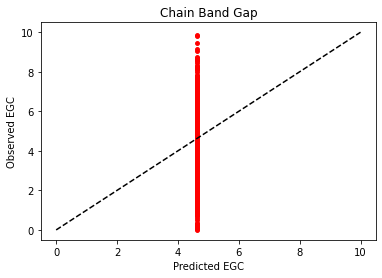

In [28]:
plt.scatter(y_EGC_pred, y_EGC, c = "r", s = 15)
plt.plot([0, 10], [0, 10] ,"k--")
plt.xlabel('Predicted EGC')
plt.ylabel('Observed EGC')
plt.title("Chain Band Gap");

### Cross Validation - EGC

In [29]:
X_EGC_train, X_EGC_test, Y_EGC_train, Y_EGC_test = train_test_split(x_EGC, y_EGC, test_size = 0.3)
  
SVR_EGC = SVR()

SVR_EGC.fit(X_EGC_train, Y_EGC_train) 

scores_EGC = cross_val_score(SVR_EGC, X_EGC_train, Y_EGC_train , cv = 5, scoring = 'neg_mean_squared_error')

Y_EGC_pred_test = SVR_EGC.predict(X_EGC_test)
# type(Y_EPS_test)
# Y_EPS_pred_train = SVR_EPS.predict(X_EPS_train)

result1_EGC = X_EGC_test
result1_EGC['value'] = Y_EGC_test
result1_EGC['prediction'] = Y_EGC_pred_test.tolist()
RMSE_EGC_CV = np.sqrt(np.absolute(min(scores_EGC)))
print('RMSE of Crystalization Tendency after Cross Validation is:', RMSE_EGC_CV)

RMSE of Crystalization Tendency after Cross Validation is: 0.11138621326199542


### Hyperparameter Tuning - EGC

In [30]:
SVR_EGC_HYP = SVR()
params_EGC = {
    'C': [0.1, 1, 10, 100, 1000], 
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf']
}

grid_EGC = GridSearchCV(SVR_EGC_HYP, params_EGC, refit = True, verbose = 3)

grid_EGC.fit(X_EGC_train, Y_EGC_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.978 total time=   1.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.979 total time=   0.7s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.964 total time=   0.7s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.908 total time=   0.6s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.960 total time=   0.4s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.991 total time=   0.6s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.992 total time=   0.5s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.988 total time=   1.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.967 total time=   1.4s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.986 total time=   0.4s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.997 total time=   0.4s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 2/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.997 total time=   0.5s
[CV 3/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.997 total time=   0.4s
[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.995 total time=   0.6s
[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.996 total time=   0.5s
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.998 total time=   0.3s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.998 total time=   0.3s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.998 total time=   0.5s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.998 total time=   0.4s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.998 total time=   0.6s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.998 total time=   0.3s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.998 total time=   0.4s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.998 total time=   0.2s
[CV 4/5] END ....C=1000, gam

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [31]:
print(grid_EGC.best_params_)
print(grid_EGC.best_estimator_)

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
SVR(C=100, gamma=0.001)


In [32]:
grid_predictions_EGC = grid_EGC.predict(X_EGC_test)
grid_predictions_full_EGC = grid_EGC.predict(x_EGC)

In [33]:
R2_EGC_tuned = r2_score(Y_EGC_test, grid_predictions_EGC)
print('R^2 of Chain Band Gap after Tuning:', R2_EGC)

RMSE_EGC = np.sqrt(mean_squared_error(Y_EGC_test, grid_predictions_EGC))
print('RMSE of Chain Band Gap after Tuning:', RMSE_EGC)

R^2 of Chain Band Gap after Tuning: -0.004060369258145791
RMSE of Chain Band Gap after Tuning: 0.01977528317963848


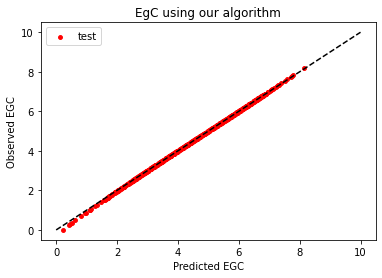

In [35]:
plt.scatter(grid_predictions_EGC, Y_EGC_test, c = "r", s = 15, label = 'test')
plt.plot([0, 10], [0, 10] ,"k--")
plt.xlabel('Predicted EGC')
plt.ylabel('Observed EGC')
plt.title("EgC using our algorithm")
plt.legend();